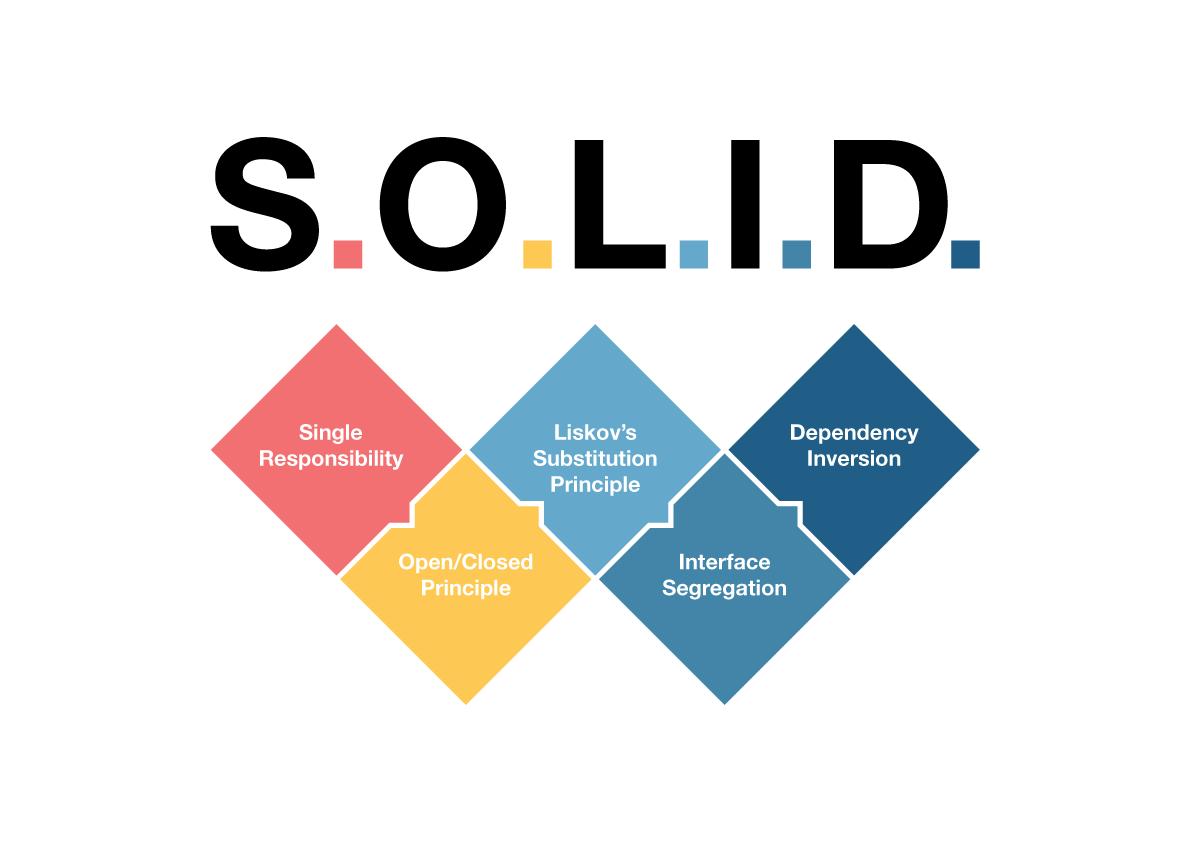

## Single Responsability

Neste princípio, as classes devem ser criadas em torno de **uma funcionalidade**. Dessa forma, fazemos com que as nossas classes sejam **enxutas** e de **fácil manutenção**. De forma geral, ***"Deve existir um e somente UM MOTIVO para que uma classe mude"***.

### E se tivermos uma classe com mais de uma responsabilidade?
Nesse caso, quando estendemos essa classe com várias responsabilidades(**regras de negócio**) entre as classes do nosso sistema, teremos uma classe com **várias funcionalidades**. Assim, quando alguma **regra de negócio** muda, precisamos alterar esta classe com muitas responsabilidades, abrindo a possibilidade de quebrar **outras funcioinalidades** que não tinham relação com a mudança.

### O que fazer quando uma classe possui múltiplas Responsabilidades?
Para deixar uma classe com muitas funcionalidades enxuta e objetiva, de acordo com este princípio, o melhor a fazer é **dividir** esta classe em outras de acordo com as funcionalidades diferentes que a mesma possui.


## Open/Closed Principle

O princípio diz que "as classes ou métodos devem estar **abertos** para **extensões** MAS **fechadas** para **MODIFICAÇÕES**.
Aqui, a preocupação é criar **Classes abstratas** da forma mais **genérica** possível, fazendo com que estas abstrações **nunca sofram modificações**.

### Mas quando e por que devemos utilizar Classes abstratas?
A **Repetição de Código** não é bem vista pelo Clean Code. O princípio DRY (Don't repeat your self) se preocupa em deixar cada "pedaço de conhecimento do sistema" em uma única representação, ou seja: Duas ou mais classes com o **mesmo** método é algo redundante no sistema, sendo uma má prática a ser tratada.

Seguindo a preocupação do DRY, uma forma de resolver o problema é transferindo estes **métodos repetidos** para uma **classe abstrata** que é herdada pelas classes que usam o método em comum.

### O que acontece se não seguirmos esse princípio do SOLID?
Quando duas ou mais classes do nosso sistema estendem uma classe em comum e esta não está totalmente **genérica**, corremos os seguintes riscos:

1. Alguma das classes herdeiras pode requerir modificações no método em comum;
2. Caso a Classe PAI mude por causa de UM filho, poderá causar bugs inesperados em outros, causando problemas em cascatas no sistema.






### Estudo de Caso para ilustrar: Salvar dados de uma classe

Precisamos salvar os dados da classe **Person**. Para isto, criamos uma classe que será responsável por salvar os dados no formato JSON. 

In [3]:
class Person:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return f'Person(name={self.name})'

In [10]:
class PersonStorage():
    def save(self, person: Person):
        print(f'Save the {person} to a JSON file')

In [12]:
sofia = Person('Sofia')

storage = PersonStorage()

storage.save(sofia)

Save the Person(name=Sofia) to a JSON file


#### E se houver a necessidade de salvar os dados da classe Person em outro formato?

Imaginando que um sistema possa necessitar evoluir com novas funcionalidades, corremos aqui o risco de precisarmos salvar os dados da classe Person em **outro formato**, por exemplo, XML. Da ótica de um programador sem conhecimento ou preocupação para com os princípios do Open/Closed Principle (OCP), tratariámos esta necessidade adicionando outros métodos de storage À classe:

In [ ]:
class PersonStorage():
    def save(self, person: Person):
        print(f'Save the {person} to a JSON file')
        
    def saveto_XML(self, person: Person):
        print(f'Save the {person} to a XML file')
        
    def saveto_TXT(self, person: Person):
        print(f'Save the {person} to a TXT file')

#### O Problema da quebra do Princípio

Quando delegamos à classe "PersonStorage" a funcionalidade de **salvar** os dados da classe **Person** e colocamos um método **muito específico**, estamos ferindo a etapa do OCP que diz "fechado para modificações", pois se precisarmos **adicionar** um método para XML, **abriremos** a classe para modificações.

É interessante termos em mente que, ao fazer quaisquer modificações em uma classe, corremos o risco de quebrarmos o sistema onde a mesma é chamada.


#### A solução
Apesar de estarmos seguindo aqui o princípio da responsabilidade única - A classe StoragePerson possui o papel de salvar a classe Person - estamos permitindo que a nossa classe StoragePerson fique **aberta para modificações**. Para prevenir que modificações ocorram nesta, devemos torná-la o mais **genérica** possível, dessa forma, tornanda-a uma classe Abstrata:

In [13]:
from abc import ABC, abstractmethod

class PersonStorage(ABC):
    @abstractmethod
    def save(self, person):
        pass

Mas e o que muda agora?

Bom, uma vez que tiramos as especificades do método **save**, agora podemos fazer a extensão da classe PersonStorage em classes que executarão o método de uma forma específica: Se antes o nosso método **save()** salvava somente em formato json, agora, ao invés de **abrirmos a classe para modificação** adicionando novos métodos, criamos novas classes que executarão o papel destes métodos de storage:

In [14]:
class PersonJSON(PersonStorage):
    def save(self, person):
        print(f'Save the {person} to a JSON file')


class PersonXML(PersonStorage):
    def save(self, person):
        print(f'Save the {person} to a XML file')

person = Person('John Doe')
storage = PersonXML()
storage.save(person)

Save the Person(name=John Doe) to a XML file


## Liskov's Substitution Principle

Este princípio determina que classes derivadas devem ser capazes de substituir totalmente as classes-pai. Ou seja: A classe derivada deve estar o mais próxima possível da classe pai, possibilitando tratarmos a classe filha como a Pai:

In [37]:
class Pessoa():
    def __init__(self,nome: str):
        self.__nome = nome
    
    def andar(self):
        print(f'{self.__nome} está andando!')
        
    def getNome(self) -> str:
        return self.__nome
    
class Aluno(Pessoa):
    def __init__(self, nome: str, matricula: str):
        super().__init__(nome)
        self.__matricula = matricula
        
    def estudar(self):
        print(f'{self.getNome()} está estudando!')

In [38]:
aluno = Aluno('Matheus','123')
aluno.andar()
aluno.estudar()
aluno.__dict__

Matheus está andando!
Matheus está estudando!


{'_Pessoa__nome': 'Matheus', '_Aluno__matricula': '123'}

## Interface Segregation

Este princípio diz que uma interface estendida deve ser usada completamente, ou seja: Não podemos criar métodos em uma interfaces que uma classe não use, pois forçamos a classe que a está implementando a construir o método para assinar o contrato.

### Python não tem uma palavra reservada INTERFACE!
Apesar da linguagem não possuir uma palavra reservada **INTERFACE**, conseguimos simular a implementação do contrato a partir do método ***register*** do pacote **abc**. Desta forma, conseguimos verificar se a classe que quer implementar a interface está apta a assinar o contrato.

#### Brechas para Erros
Uma 

### Estudo de caso
Imaginando uma classe Pizza, que possui um método ***adicionarFrango***. Se a pizzaria possuir Pizzas Veganas, fará sentido a classe **PizzaVegana** ser forçada a utilizar o método ***adicionarFrango*** do contrato?

Observe:

In [62]:
from abc import ABC,abstractmethod

class Pizza(ABC):
    
    @abstractmethod
    def adicionaFrango(self):
        print('Adicionou Frango')
        
    @abstractmethod
    def adicionaPortuguesa(self):
        print('Adicionou Portuguesa')
        
        
class PizzaVegana():
    def __init__(self):
        pass
    
    # def adicionaFrango(self):
    #     print('Adicionou Frango')
        
    def adicionaPortuguesa(self):
        print('Adicionou Portuguesa')

In [58]:
vegan = PizzaVegana()
vegan.adicionaPortuguesa()

Adicionou Portuguesa


### Verificando o Contrato

Observa a célula abaixo:

In [59]:
print(isinstance(vegan,Pizza))
print(issubclass(PizzaVegana, Pizza))

False
False


Como a classe **PizzaVegana** não possui relação alguma (herança ou 'registro') com a "interface" **Pizza**, o retorno das verificações de instancia e subclasses são falsos.

Abaixo, utilizamos o método ***register*** do pacote **abc** para registrar uma "subclasse virtual" de **PizzaVegana**. Desta forma, se a classe que quer implementar a interface estiver implementos os métodos de forma correta, o verificador ***isinstance*** retornará True:

In [63]:
Pizza.register(PizzaVegana)

print(isinstance(vegan,Pizza))
print(issubclass(PizzaVegana,Pizza))

vegan.adicionaFrango()

False
True


AttributeError: 'PizzaVegana' object has no attribute 'adicionaFrango'

Vemos acima que o verificador ***isinstance*** retorna falso, pois **não implementa** o método ***adicionaFrango*** da classe Pizza. Logo, se formos utilizar o método, gerará um erro.

Agora, observe abaixo se utilizarmos todos os métodos que a interface pede:

In [71]:
class PizzaPadrao:
    
    def adicionaFrango(self):
        print('Adicionou frango!')
        
    def adicionaPortuguesa(self):
        print('Adicionou Portuguesa!')

In [72]:
padrao = PizzaPadrao()

Pizza.register(PizzaPadrao)

print(isinstance(padrao,Pizza))
print(issubclass(PizzaPadrao,Pizza))

padrao.adicionaFrango()

True
True
Adicionou frango!


#### Bonus: Testando o poliformismo

A Classe **TestePizza** recebe, em sua instancia, uma classe do tipo Pizza. Nas linguagens foretemente tipadas como o Java, poderíamos usar uma classe PizzaVegana (que implementa a classe Pizza) neste parâmetro. Será que o método ***register*** consegue obter este poder?

In [87]:
class PizzaDoce:
    def adicionaFrango(self):
        print('Adicionou frango!')
        
    def adicionaPortuguesa(self):
        print('Adicionou Portuguesa!')
    
    def adicionaChocolate(self):
        print('Adiciona chocolate!')

In [88]:
Pizza.register(PizzaDoce)

doce = PizzaDoce()
isinstance(doce,Pizza)

True

In [89]:
class TestePizza():
    def __init__(self,Pizza):
        self.pizza = Pizza
        

In [94]:
teste = TestePizza(doce)

In [95]:
teste.__dict__

{'pizza': <__main__.PizzaDoce at 0x1d6efff8880>}

In [96]:
teste.pizza.adicionaPortuguesa()

Adicionou Portuguesa!


In [97]:
teste.pizza.adicionaChocolate()

Adiciona chocolate!


Observando o exemplo acima, sim, a função register consegue trabalhar com polimorfismo! :D

### Afinal, qual o objetivo do Princípio de Segregação de Interfaces?

O objetivo final deste princípio é fazer com que os desenvolvedores escrevam interfaces com base na sua funcionalidade primordial. No exemplo mostrado, temos uma interface **Pizza** com um método ***adicionaFrango***, o que faz com que, caso tivéssmos classes do tipo **PizzaVegana** ou **PizzaDoce**, classes que não deveriam utilizar estes métodos tendo que implementá-los em sua estrutura, mesmo não fazendo sentido para a semântica da classe.

Neste caso, faria sentido o método ***adicionaFrango*** estar somente em uma classe **PizzaSalgada**, por exemplo!



## Dependency Inversion

O princípio de Inversão de Dependências possui dois valores:

### 1.  Módulos de alto nível não devem depender de módulos de baixo nível e ambos devem depender de abstrações

Podemos resumir este tópico do Princípio com uma palavra: **Acoplamento**, deixando um módulo totalmente dependente de outro. Geralmente, isto ocorre quando **instanciamos** um módulo **dentro** de outro.

No artigo <a href='https://www.devmedia.com.br/introducao-a-inversao-de-controle/29698#modulo-mvp'>Introdução à Inversão de Controle, do DevMedia</a>, temos uma classe **Cliente** como ***alto nível*** e uma classe **Endereco** como ***Baixo Nível*** (Pois o endereço só existirá na aplicação se houver um cliente). Na forma abaixo, estamos causando um fortíssimo acoplamento, deixando a classe **Cliente** dependete da classe **Endereco**, quebrando a lógica do negócio:

In [1]:
class Endereco:
    def __init__(self, endereco: str):
        self.__endereco = endereco
    
class Cliente:
    def __init__(self,endereco: str):
        self.__endereco = Endereco(endereco)


Graças ao forte acoplamento acima, eventualmente podemos ter que modificar a classe **Cliente** se o negócio pedir que o cliente tenha um **EnderecoResidencial** ou **EnderecoComercial**. Ou seja: Teremos que **adicionar** novas instâncias na Classe **Cliente**, ferindo o princípio **Open/Closed**.

Um grande problema do acoplamento é o fato de que, caso a **EnderecoComercial** ou **EnderecoResidencial**  **deixe de existir** ou **esteja quebrada**, a classe Cliente deixará de funcionar, pois o alto acoplamento de um alto Nível para níveis mais baixos causam problemas em cascata.

Outros dois fatores são abordados no texto <a href='https://www.macoratti.net/11/07/ioc_di1.htm'>.NET - Inversão de Controle (IoC) e Injeção de Dependência (DI)</a>:

- Se houver qualquer modificação na classe Pedido isso irá afetar a classe Cliente;
- Se você for realizar testes unitários com a classe Cliente vai ter problemas pois possui uma instância e métodos de outra classe sendo referenciados nela.

### 2.  Abstrações não devem depender de detalhes, mas detalhes devem depender de abstrações.

Nesta parte do Princípio, há uma boa analogia mencionada no <a href='https://www.devmedia.com.br/introducao-a-inversao-de-controle/29698#modulo-mvp'>artigo anterior</a>:

Considerando o Motor de um Carro:

Os **pedais** e o **volante** podem ser vistos como ***abstrações*** do motor, ou seja, são as funcionalidades expostas por ele para o seu controle. Se um dia alguém quiser **trocar o motor** do carro para uma versão mais nova, essa alteração **será transparente para o motorista**, que **continuará usando os pedais e o volante** sem ter ciência de que o motor foi trocado. O modo de direção continua o mesmo. Por outro lado, sem os pedais e o volante o motor não tem serventia, demonstrando a dependência do motor das funcionalidades expostas.

Em outras palavras: O Motor expõe os pedais e volante para o cliente acessá-lo. Se trocarmos o Motor, o cliente não perceberá a diferença pois **somente** os pedais e o volante ficam exposto para ele. Contudo, se **retirarmos** os pedais e o volante do Motor, o mesmo perderá a utilidade por conta do Cliente não conseguir mais acessá-lo, demonstrando que a abstração de **Motor** está dependênte de detalhes (pedais e volante)!



### Dependency Injection (DI)
Neste exemplo, para a classe Cliente seguir este princípio, temos que fazer a **inversão de controle** para tirar a dependência de existência dela, fazendo com que o **Endereco** que dependa da **Cliente** pra existir. Para o nosso código seguir este princípio, usamos a "ferramenta" chamada **Injeção de Dependência** que, como o nome diz, serve para injetarmos uma dependência em nosso código, mas de forma que o nosso código **não dependa desta para existir!**

A Injeção de Dependência possui 4 formas de ser implementada: Construtor, propriedade, interface e framework.


#### Construtor
Nesta abordagem, a classe Cliente passa a receber uma **instância** de Endereco. Trazendo as seguintes vantagens:
- A classe Cliente não se importa sobre **como** o objeto Endereco foi instânciado, tirando esta preocupação para ela;
- Se a classe Endereco for mudada, isso não irá afetar a classe Cliente, pois, por exemplo, se o construtor da classe Endereco for modificado, a classe Cliente não estará fazendo a instância, logo, não será modificada para atualizar a instância de endereco;


In [12]:
    
class Endereco():
    def __init__(self, endereco: str):
        self.__endereco = endereco
        
class Cliente:
    def __init__(self,endereco: Endereco):
        self.__endereco = endereco
    
    def getEndereco(self):
        return self.__endereco


#### Propriedade - Setter Injection
A classe a ser tratada possui métodos públicos de acesso à dependência (gets e sets). Dessa forma, deixamos o nosso construtor livre de modificações, sendo possível termos um construtor vazio (uma vez que o tiramos desta responsabilidade de receber a instância):

In [41]:
class Cliente:
    def __init__(self):
        self.__endereco: endereco
        pass
    def getEndereco(self):
        try:
            return self.__endereco
        except AttributeError as ae:
            return "Classe sem cliente!"
    
    def setEndereco(self,endereco: Endereco):
        self.__endereco = endereco

In [43]:
cliente = Cliente()

endereco = Endereco("rua x")
print(cliente.getEndereco())
cliente.setEndereco(endereco)
cliente.getEndereco()

Classe sem cliente!


O problema dessa abordagem é o fato de que, estando públicos os acessos ao objeto da dependência, fere o encapsulamento da orientação a objetos.

#### Interface Injection
Nesta abordagem, a nossa classe a ser ajustada recebe um objeto que faça referência a uma outra interface:

# Refatorar para uso de interface

In [5]:
class Endereco:
    def __init__(self, endereco: str):
        self.__endereco = endereco
        
    def getEndereco() -> str:
        return self.__endereco

class EnderecoResidencial(Endereco):
    def __init__(self):
        pass
    
class EnderecoProfissional(Endereco):
    def __init__(self):
        pass
    
class Cliente():
    def __init__(self):
        pass
    
    def setObjEndereco(self,endereco: Endereco):
        self.endereco = endereco

In [8]:
class Teste():
    def __init__(self):
        pass

In [11]:
re = EnderecoResidencial()

cliente = Cliente()

# cliente.setObjEndereco(re)

teste = Teste()
cliente.setObjEndereco(teste)

https://www.macoratti.net/11/07/ioc_di1.htm

https://www.devmedia.com.br/introducao-a-inversao-de-controle/29698#modulo-mvp

https://campuscode.com.br/conteudos/s-o-l-i-d-principio-de-inversao-de-dependencia

### Referências bibliográficas
Padrões de Projeto (Design Patterns) com Python, Geek Labs

https://campuscode.com.br/conteudos/s-o-l-i-d-principio-de-inversao-de-dependencia
https://www.devmedia.com.br/introducao-a-inversao-de-controle/29698#modulo-mvp
https://www.macoratti.net/11/07/ioc_di1.htm